In [1]:
import pandas as pd
import numpy as np
from scipy import stats

In [2]:
data = pd.read_csv('USVideos.csv')

## Data Struture

In [3]:
print(data.shape)
print(data.dtypes)
print(data.columns.values)

(40949, 16)
video_id                  object
trending_date             object
title                     object
channel_title             object
category_id                int64
publish_time              object
tags                      object
views                      int64
likes                      int64
dislikes                   int64
comment_count              int64
thumbnail_link            object
comments_disabled           bool
ratings_disabled            bool
video_error_or_removed      bool
description               object
dtype: object
['video_id' 'trending_date' 'title' 'channel_title' 'category_id'
 'publish_time' 'tags' 'views' 'likes' 'dislikes' 'comment_count'
 'thumbnail_link' 'comments_disabled' 'ratings_disabled'
 'video_error_or_removed' 'description']


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

In [5]:
data.iloc[:,3:10].describe(include = 'object')

,channel_title,publish_time,tags
count,40949,40949,40949
unique,2207,6269,6055
top,ESPN,2018-05-18T14:00:04.000Z,[none]
freq,203,50,1535


## Miary położenia

In [6]:
# Badanie średniej liczby odttworzeń. Sprawdzenie różnicy pomiędzy dużymi, średnimi i małymi kanałami
big = data[data['channel_title'].map(data['channel_title'].value_counts()) >= 70]
medium = data[data['channel_title'].map(data['channel_title'].value_counts()).between(25,69)]
small = data[data['channel_title'].map(data['channel_title'].value_counts()) < 25]

In [7]:
print(big.shape[0],medium.shape[0],small.shape[0])

14024 13003 13922


In [8]:
print('Mean - standard')
print("Mean number of views for big channels is : "+"{:,.2f}".format(big['views'].mean()))
print("Mean number of views for medium channels is : "+"{:,.2f}".format(medium['views'].mean()))
print("Mean number of views for small channels is : "+"{:,.2f}".format(small['views'].mean()))

Mean - standard
Mean number of views for big channels is : 2,155,649.62
Mean number of views for medium channels is : 3,362,240.11
Mean number of views for small channels is : 1,632,073.82


In [9]:
print('Trimmed mean - we are trimming 10% of biggest and lowest observations and then we calculate the mean')
print("Mean number of views for big channels is : "+"{:,.2f}".format(stats.trim_mean(big['views'],0.1)))
print("Mean number of views for medium channels is : "+"{:,.2f}".format(stats.trim_mean(medium['views'],0.1)))
print("Mean number of views for small channels is : "+"{:,.2f}".format(stats.trim_mean(small['views'],0.1)))

Trimmed mean - we are trimming 10% of biggest and lowest observations and then we calculate the mean
Mean number of views for big channels is : 1,221,430.48
Mean number of views for medium channels is : 1,380,194.99
Mean number of views for small channels is : 663,224.35


In [10]:
print('Median')
print("Mean number of views for big channels is : "+"{:,.2f}".format(big['views'].median()))
print("Mean number of views for medium channels is : "+"{:,.2f}".format(medium['views'].median()))
print("Mean number of views for small channels is : "+"{:,.2f}".format(small['views'].median()))

Median
Mean number of views for big channels is : 943,212.50
Mean number of views for medium channels is : 775,185.00
Mean number of views for small channels is : 371,800.00


## Miary rozproszenia

In [11]:
print('Standard deviation')
print("Mean number of views for big channels is : "+"{:,.2f}".format(big['views'].std()))
print("Mean number of views for medium channels is : "+"{:,.2f}".format(medium['views'].std()))
print("Mean number of views for small channels is : "+"{:,.2f}".format(small['views'].std()))

Standard deviation
Mean number of views for big channels is : 5,279,118.04
Mean number of views for medium channels is : 10,334,754.39
Mean number of views for small channels is : 5,610,543.76


In [12]:
print('IQR')
print("Mean number of views for big channels is : "+"{:,.2f}".format(big['views'].quantile(0.75) - big['views'].quantile(0.25)))
print("Mean number of views for medium channels is : "+"{:,.2f}".format(medium['views'].quantile(0.75) - medium['views'].quantile(0.25)))
print("Mean number of views for small channels is : "+"{:,.2f}".format(small['views'].quantile(0.75) - small['views'].quantile(0.25)))

IQR
Mean number of views for big channels is : 1,600,179.25
Mean number of views for medium channels is : 2,107,649.50
Mean number of views for small channels is : 1,061,029.75


In [13]:
from statsmodels import robust
print('Median Absolute Deviation - MAD')
print('Outliers-robust method')
print("Mean number of views for big channels is : "+"{:,.2f}".format(robust.scale.mad(big['views'])))
print("Mean number of views for medium channels is : "+"{:,.2f}".format(robust.scale.mad(medium['views'])))
print("Mean number of views for small channels is : "+"{:,.2f}".format(robust.scale.mad(small['views'])))

Median Absolute Deviation - MAD
Outliers-robust method
Mean number of views for big channels is : 960,311.85
Mean number of views for medium channels is : 903,641.60
Mean number of views for small channels is : 478,858.28


## Boxplots & Histograms

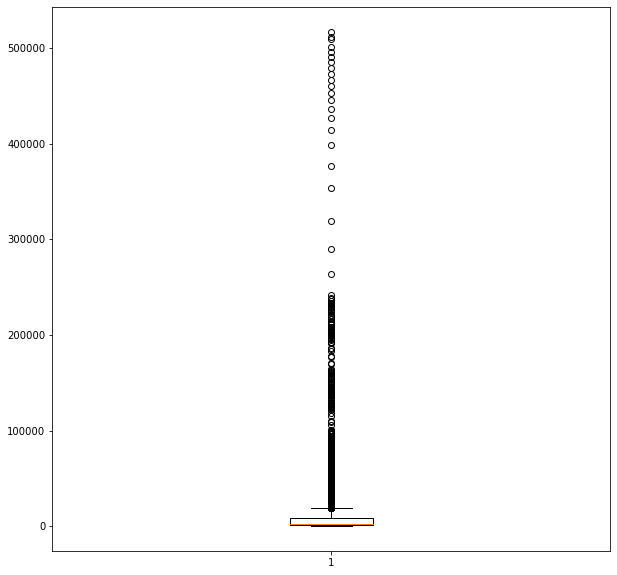

In [14]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize =(10, 10))
plt.boxplot(medium['comment_count'])
plt.show();

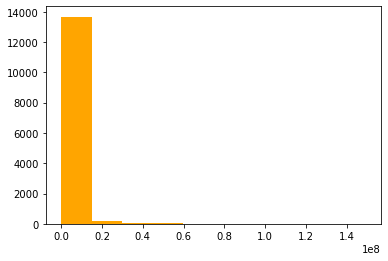

In [15]:
plt.hist(small['views'],bins = 10,color = 'orange',orientation='vertical');

## Bar chart

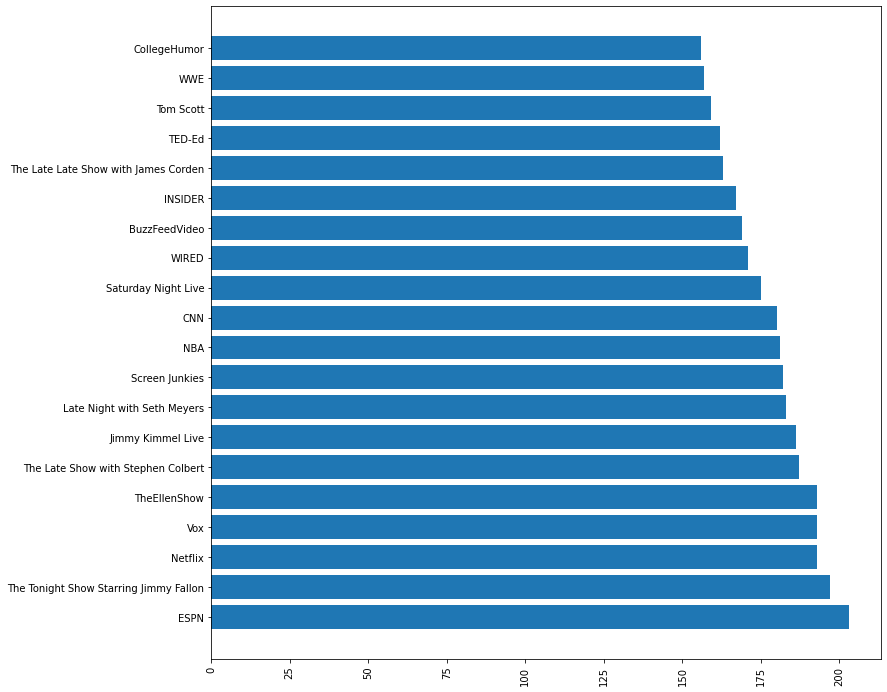

In [32]:
channels = pd.DataFrame(data['channel_title'].value_counts()[0:20])
fig = plt.figure(figsize =(12, 12))
plt.barh(channels.index.values,channels.channel_title)
plt.xticks(rotation=90,size= 10)
plt.show()

## Korelacja

In [17]:
fifa = pd.read_csv('fifa22.csv')

In [18]:
fifa.drop(labels = ['club_jersey_number', 'club_loaned_from','nation_team_id', 'nation_position', 'nation_jersey_number',
       'league_name', 'league_level', 'club_position','ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf',
       'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'nationality_id', 'club_joined',
       'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'gk', 'dob', 'club_team_id', 'real_face',
       'sofifa_id', 'player_url','player_face_url', 'club_logo_url', 'club_flag_url', 'player_tags','player_traits',
       'nation_logo_url', 'nation_flag_url','international_reputation'],axis = 1,inplace = True)

In [19]:
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 0 to 19238
Data columns (total 61 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   short_name                   19239 non-null  object 
 1   long_name                    19239 non-null  object 
 2   player_positions             19239 non-null  object 
 3   overall                      19239 non-null  int64  
 4   potential                    19239 non-null  int64  
 5   value_eur                    19165 non-null  float64
 6   wage_eur                     19178 non-null  float64
 7   age                          19239 non-null  int64  
 8   height_cm                    19239 non-null  int64  
 9   weight_kg                    19239 non-null  int64  
 10  club_name                    19178 non-null  object 
 11  club_contract_valid_until    19178 non-null  float64
 12  nationality_name             19239 non-null  object 
 13  preferred_foot  

In [50]:
import seaborn as sns
spain = fifa.loc[(fifa.nationality_name == 'Spain') & (fifa['player_positions'].str.contains('CM'))]
poland = fifa.loc[(fifa.nationality_name == 'Poland')]

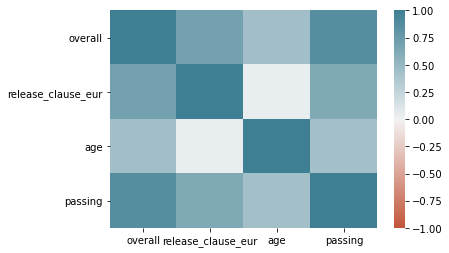

In [37]:
sns.heatmap(spain.loc[:,['overall','release_clause_eur','age','passing']].corr(),vmin = -1,vmax = 1,
           cmap=sns.diverging_palette(20,220,as_cmap=True));


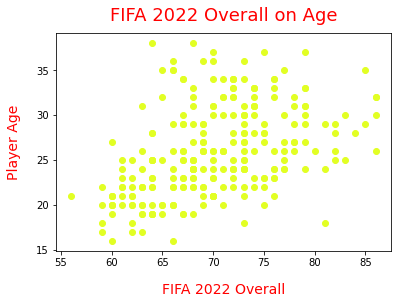

In [48]:
import matplotlib.pyplot as plt
plt.scatter(x = spain.overall, y = spain.age, c= '#e2ff24')
plt.title('FIFA 2022 Overall on Age', fontsize=18, y=1.03 ,c = 'red')
plt.xlabel("FIFA 2022 Overall", fontsize=14, labelpad=15, c = 'red')
plt.ylabel("Player Age", fontsize=14, labelpad=15, c = 'red');

## Badanie dwóch lub więcej zmiennych

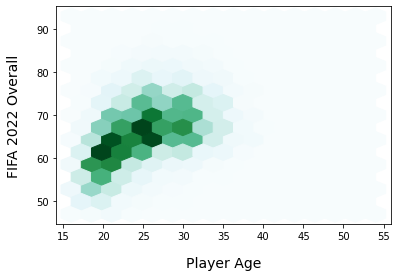

In [57]:
#DWIE ZMIENNE NUMERYCZNE
#Heksagonalny wykres - dobry na przedstawienie zależności między danymi dla zbior uposiadającego mnóstwo obserwacji
plt.hexbin(fifa.age, fifa.overall, gridsize = 15, cmap ='BuGn') 
plt.ylabel("FIFA 2022 Overall", fontsize=14, labelpad=15)
plt.xlabel("Player Age", fontsize=14, labelpad=15);

In [59]:
#DWIE ZMIENNE KATEGORIALNE
#tablica kontyngencji - liczność według kategorii 
pd.crosstab(poland.body_type,poland.work_rate,margins = True)

work_rate,High/High,High/Low,High/Medium,Low/High,Low/Medium,Medium/High,Medium/Low,Medium/Medium,All
body_type,,,,,,,,,
Lean (170-),2,0,2,0,0,0,0,0,4
Lean (170-185),6,3,19,0,0,7,9,29,73
Lean (185+),2,0,4,1,1,7,3,45,63
Normal (170-),1,0,2,0,0,0,0,1,4
Normal (170-185),8,7,26,3,2,16,6,66,134
Normal (185+),3,0,10,3,1,12,2,82,113
Stocky (170-),0,0,1,0,0,0,0,0,1
Stocky (170-185),1,0,1,0,0,3,0,1,6
Stocky (185+),0,0,0,0,1,1,0,2,4


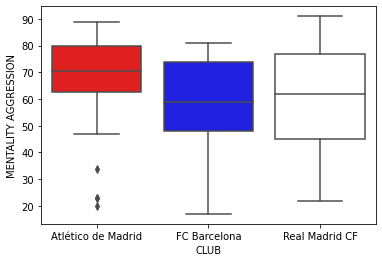

In [90]:
#ZMIENNA KATEGORIALNA I NUMERYCZNA
#boxplot
top3 = fifa[fifa.club_name.isin(['Real Madrid CF','Atlético de Madrid','FC Barcelona'])]
fig = sns.boxplot(data=top3, x='club_name', y='mentality_aggression',palette=['red','blue','white'])
fig.set_xlabel("CLUB")
fig.set_ylabel("MENTALITY AGGRESSION");

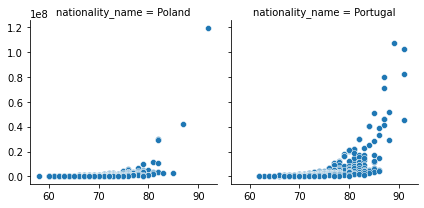

In [107]:
#WIZUALIZACJA WIELU ZMIENNYCH - FACETY
ptes = fifa[fifa.nationality_name.isin(['Portugal','Poland'])]
g = sns.FacetGrid(ptes, col="nationality_name")
g.map_dataframe(sns.scatterplot, x="potential", y="value_eur")